# House Data

In [2]:
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
import scipy as sp
plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', 300)

In [3]:
df=pd.read_csv('kc_house_data_train.csv')

In [4]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


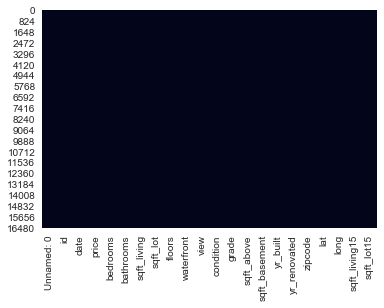

In [5]:
sns.heatmap(df.isna(), cbar=False)

In [6]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
too_many_bedrooms = {0:1}
df['bedrooms'] = df['bedrooms'].replace(too_many_bedrooms)

## multi regression

In [8]:
mlr_model = ols(formula='price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+yr_built+yr_renovated+lat+long+sqft_living15+sqft_lot15', data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     2604.
Date:                Mon, 24 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:32:49   Log-Likelihood:            -2.3615e+05
No. Observations:               17290   AIC:                         4.723e+05
Df Residuals:                   17274   BIC:                         4.725e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.514e+07   1.76e+06    -19.934      0.000   -3.86e+07   -3.17e+07
bedrooms      -3.485e+04   2137.020    -16.309      0.000    -3.9e+04   -3.07e+04
bathrooms      3.819e+04   3687.145     10.358      0.000     3.1e+04    4.54e+04
sqft_living     174.0491      3.822     45.535      0.000     166.557     181.541
sqft_lot          0.1161      0.053      2.206      0.027       0.013       0.219
floors         1.214e+04   3679.062      3.301      0.001    4931.461    1.94e+04
waterfront     6.038e+05   1.94e+04     31.050      0.000    5.66e+05    6.42e+05
view           4.621e+04   2388.013     19.351      0.000    4.15e+04    5.09e+04
condition       2.94e+04   2668.483     11.017      0.000    2.42e+04    3.46e+04
grade          9.906e+04   2449.134     40.447      0.000    9.43e+04    1.04e+05
yr_built      -2497.2882     82.517    -30.264      0.000   -2659.029   -2335.547
yr_renovated     18.7140      4.207      4.449      0.000      10.468      26.960
lat            5.511e+05   1.19e+04     46.188      0.000    5.28e+05    5.75e+05
long          -1.073e+05   1.33e+04     -8.050      0.000   -1.33e+05   -8.12e+04
sqft_living15    31.4516      3.901      8.063      0.000      23.805      39.098
sqft_lot15       -0.3192      0.083     -3.868      0.000      -0.481      -0.157
==============================================================================
Omnibus:                    15563.271   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1810241.156
Skew:                           3.876   Prob(JB):                         0.00
Kurtosis:                      52.524   Cond. No.                     5.73e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.73e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## drop columns

In [10]:
df.isnull().mean()

Unnamed: 0       0.0
id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

In [11]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


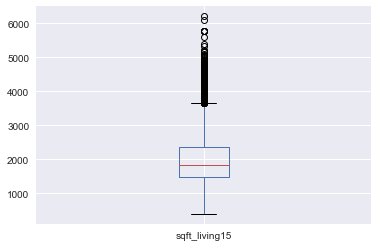

In [13]:
df.boxplot('sqft_living15')

In [14]:
df = df[df['sqft_basement']<4000]

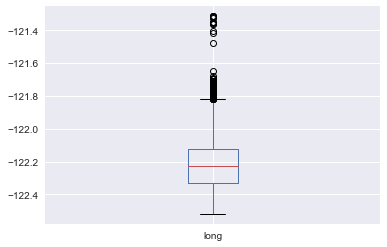

In [15]:
df.boxplot('long')

In [16]:
df = df[df['bedrooms']<15]

In [17]:
df = df[df['sqft_above']<8200]

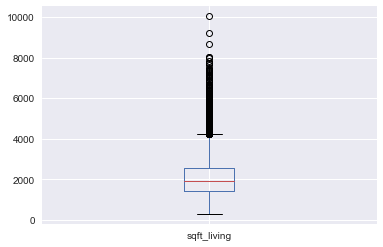

In [18]:
df.boxplot('sqft_living')

In [19]:
df = df[df['sqft_living']<12000]

In [20]:
type(df['view'][0])#.value_counts()
df['view']

0        0
1        0
2        2
3        2
4        0
        ..
17285    1
17286    0
17287    0
17288    0
17289    0
Name: view, Length: 17285, dtype: int64

In [21]:
df['view_true']=df.view.map({0:0,1:1,2:1,3:1,4:1})

In [22]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,view_true
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,0
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,0
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,1
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,1
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,0


In [23]:
type(df['grade'][0])

numpy.int64

In [24]:
df['grade'].value_counts()

7     7182
8     4848
9     2099
6     1648
10     893
11     319
5      192
12      70
4       22
13       9
3        2
1        1
Name: grade, dtype: int64

In [25]:
df['condition_true']=df.condition.map({1:'poor',2:'poor',3:'average',4:'good',5:'good'})

In [26]:
df['grade_true']=df.grade.map({1:'low_quality',2:'low_quality',3:'low_quality',4:'low_quality',5:'low_quality',6:'low_quality',7:'avg_quality',8:'avg_quality',9:'high_quality',10:'high_quality',11:'high_quality',12:'high_quality',13:'high_quality'})


In [27]:
pd.get_dummies(df,columns=['waterfront','view_true','condition_true','grade_true'], drop_first=True)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_1,view_true_1,condition_true_good,condition_true_poor,grade_true_high_quality,grade_true_low_quality
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,0,0,1,0,0,0
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,0,0,1,0,0,0
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,0,1,0,0,1,0
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,0,1,0,0,1,0
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400,0,1,0,0,0,0
17286,17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013,0,0,0,0,0,0
17287,17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403,0,0,0,0,0,0
17288,17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028,0,0,1,0,0,0


In [28]:
df['price_log'] = np.log(df['price'])
df['price_sqrt'] = np.sqrt(df['price'])

In [29]:
cols  = ['bedrooms', 'bathrooms',
       'sqft_living', 'waterfront', 'view','condition','grade','sqft_above', 'yr_built','yr_renovated','lat','long',
       'sqft_living15'
       ]

In [30]:
#break the colums in to groups to plot 4 on a row at a time
n = 4
row_groups= [cols[i:i+n] for i in range(0, len(cols), n) ]

In [31]:
df['yr_built'].value_counts()

2014    453
2004    360
2005    344
2006    343
2003    337
       ... 
1933     27
1901     25
1902     22
1934     19
1935     18
Name: yr_built, Length: 116, dtype: int64

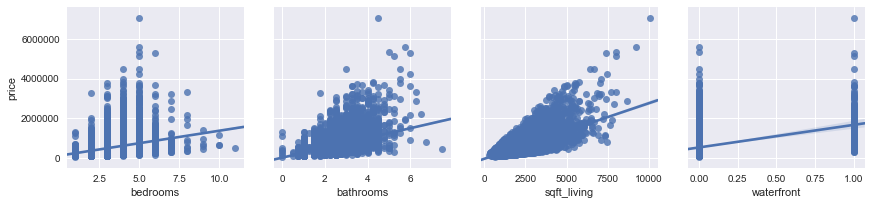

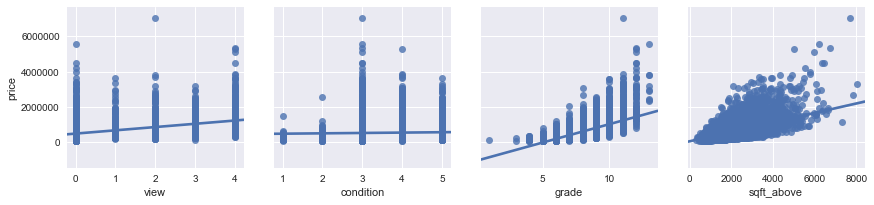

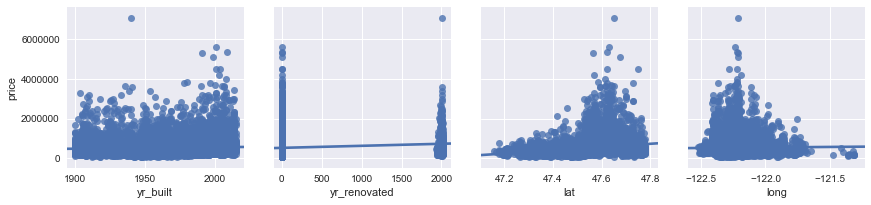

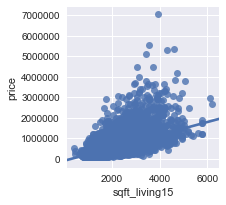

In [32]:
for i in row_groups: 
    sns.pairplot(data=df, y_vars=['price'],x_vars=i, kind="reg", height=3)
    sns.plot

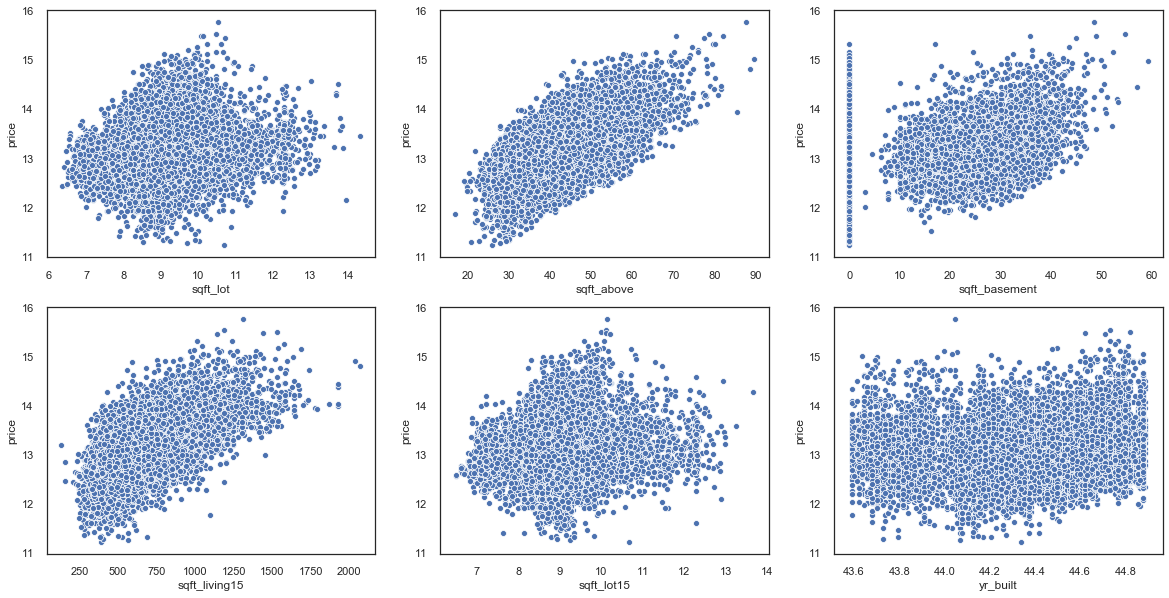

In [146]:
plt.figure(figsize=(20,10))
#============================
plt.subplot(231)
sns.scatterplot(np.log(df['sqft_lot']),np.log(df['price']))
#============================
plt.subplot(232)
sns.scatterplot(np.sqrt(df['sqft_above']),np.log(df['price']))
#============================
plt.subplot(233)
sns.scatterplot(np.sqrt(df['sqft_basement']),np.log(df['price']))
#============================
plt.subplot(234)
sns.scatterplot((df['sqft_living15'])**1/3,np.log(df['price']))
#============================
plt.subplot(235)
sns.scatterplot(np.log(df['sqft_lot15']),np.log(df['price']))
#============================
plt.subplot(236)
sns.scatterplot(np.sqrt(df['yr_built']),np.log(df['price']))
#============================
plt.show()


In [147]:
df['log_price']=np.log(df['price'])
df['log_sqft_lot']=np.log(df['sqft_lot'])
df['sqrt_sqft_above']=np.sqrt(df['sqft_above'])
df['sqrt_sqft_basement']=np.sqrt(df['sqft_basement'])
df['1/3_sqft_living15']=(df['sqft_living15'])**1/3
df['log_sqft_lot15']=np.log(df['sqft_lot15'])
df['sqrt_yr_built']=np.sqrt(df['yr_built'])

In [253]:
final=df[['bedrooms', 'bathrooms','floors', 'waterfront',
         'sqft_lot15', 'view_true','condition', 'grade', 
         'price_log', 'price_sqrt', 'log_price',
         'log_sqft_lot', 'sqrt_sqft_above', 'sqrt_sqft_basement',
         '1/3_sqft_living15', 'log_sqft_lot15', 'sqrt_yr_built']]

In [343]:
final.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'sqft_lot15',
       'view_true', 'condition', 'grade', 'price_log', 'price_sqrt',
       'log_price', 'log_sqft_lot', 'sqrt_sqft_above', 'sqrt_sqft_basement',
       '1/3_sqft_living15', 'log_sqft_lot15', 'sqrt_yr_built'],
      dtype='object')

In [338]:
feature_columns = ['bedrooms', 'bathrooms','floors', 'waterfront',
         'sqft_lot15', 'view_true','condition', 'grade', 
         'log_sqft_lot', 'sqrt_sqft_above', 'sqrt_sqft_basement',
         '1/3_sqft_living15', 'log_sqft_lot15', 'sqrt_yr_built']

In [170]:
final['sqrt_sqft_basement']

0         0.000000
1        32.710854
2         0.000000
3         0.000000
4         0.000000
           ...    
17285    34.928498
17286     0.000000
17287     0.000000
17288    24.494897
17289     0.000000
Name: sqrt_sqft_basement, Length: 17285, dtype: float64

In [344]:
target = final['price_log']
inputs=final.drop(columns='price_log')
features = final[feature_columns]
inputs

,bedrooms,bathrooms,floors,waterfront,sqft_lot15,view_true,condition,grade,price_sqrt,log_price,log_sqft_lot,sqrt_sqft_above,sqrt_sqft_basement,1/3_sqft_living15,log_sqft_lot15,sqrt_yr_built
0,4,2.25,2.0,0,7700,0,4,8,604.152299,12.807653,9.093020,45.497253,0.000000,796.666667,8.948976,44.564560
1,5,3.00,1.0,0,6283,0,5,8,930.053762,13.670485,8.814330,42.778499,32.710854,790.000000,8.745603,44.463468
2,4,2.50,2.0,0,9685,1,3,11,1018.822850,13.852806,9.295876,61.400326,0.000000,1236.666667,9.178334,44.687806
3,3,3.50,2.0,0,14226,1,3,12,1220.655562,14.214287,9.589325,67.527772,0.000000,1350.000000,9.562827,44.609416
4,3,2.50,2.0,0,4050,0,3,9,843.208159,13.474428,8.589700,50.497525,0.000000,750.000000,8.306472,44.766059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,5,2.50,1.0,0,10400,1,3,8,866.025404,13.527828,9.206332,44.944410,34.928498,910.000000,9.249561,44.249294
17286,2,1.75,2.0,0,4013,0,3,7,663.324958,12.994530,8.294050,36.055513,0.000000,450.000000,8.297294,44.136153
17287,3,1.00,1.0,0,9403,0,3,7,556.776436,12.644328,9.197863,32.403703,0.000000,586.666667,9.148784,44.192760
17288,3,1.50,1.5,0,108028,0,4,7,653.834842,12.965710,10.673272,36.055513,24.494897,693.333333,11.590146,44.395946


In [345]:
scaler.fit(inputs)
inputs_scaled=scaler.transform(inputs)

In [346]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [347]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=34,test_size=0.2)

In [348]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train =pd.DataFrame(data=scaler.transform(X_train), columns=feature_columns)
X_test =pd.DataFrame(data=scaler.transform(X_test), columns=feature_columns)

In [349]:
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,bedrooms,bathrooms,floors,waterfront,sqft_lot15,view_true,condition,grade,log_sqft_lot,sqrt_sqft_above,sqrt_sqft_basement,1/3_sqft_living15,log_sqft_lot15,sqrt_yr_built
bedrooms,NaN,0.522285,0.175684,0.016181,0.031496,0.080057,0.029662,0.365038,0.186748,0.510269,0.259438,0.402580,0.165538,0.159956
bathrooms,NaN,NaN,0.498967,0.056860,0.089139,0.175113,0.123985,0.663632,0.100336,0.694249,0.233979,0.568359,0.093568,0.510730
floors,NaN,NaN,NaN,0.023638,0.003364,0.010392,0.263450,0.458351,0.226635,0.547354,0.275480,0.279271,0.216803,0.489049
waterfront,NaN,NaN,NaN,NaN,0.020140,0.264289,0.009632,0.087762,0.066474,0.057604,0.051515,0.086680,0.072201,0.021780
sqft_lot15,NaN,NaN,NaN,NaN,NaN,0.067101,0.005577,0.122668,0.632927,0.192504,0.012621,0.177062,0.706714,0.078213
view_true,NaN,NaN,NaN,NaN,NaN,NaN,0.046636,0.230857,0.108905,0.138741,0.247650,0.268516,0.106373,0.059348
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.139488,0.066792,0.154909,0.166605,0.091355,0.075295,0.357512
grade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.188219,0.757483,0.108359,0.717215,0.190060,0.447767
log_sqft_lot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.329250,0.032615,0.360296,0.919027,0.003016
sqrt_sqft_above,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.145105,0.727946,0.309574,0.449576


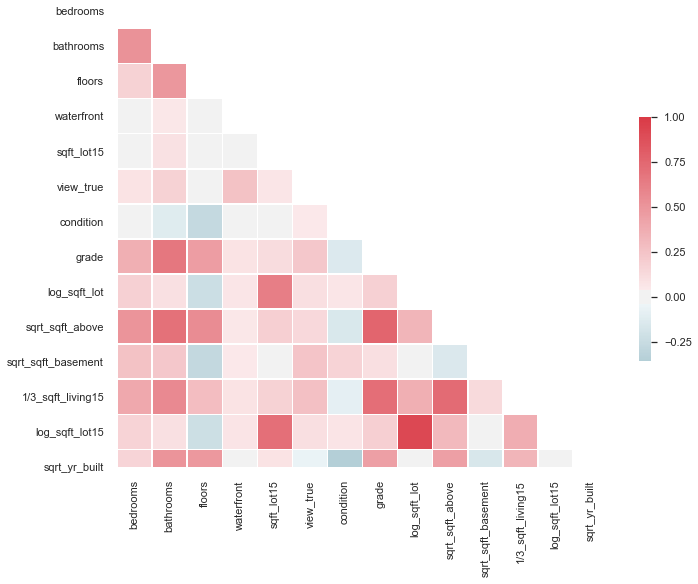

In [350]:

sns.set(style="white")


# Compute the correlation matrix
corr = X_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [351]:
len(X_train.columns)

14

In [352]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
X_train.drop(columns=to_drop, inplace=True)
X_test.drop(columns=to_drop, inplace=True)


In [353]:
len(X_train.columns)

13

In [354]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'sqft_lot15',
       'view_true', 'condition', 'grade', 'log_sqft_lot', 'sqrt_sqft_above',
       'sqrt_sqft_basement', '1/3_sqft_living15', 'sqrt_yr_built'],
      dtype='object')

In [274]:
from sklearn.metrics import r2_score, mean_squared_error, make_scorer

In [275]:
scorer = make_scorer(mean_squared_error, greater_is_better = False)
def rmse_cv_train(model):
    rmse= np.sqrt(abs(cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10)))
    return(rmse)
def rmse_cv_test(model):
    rmse= np.sqrt(abs(cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10)))
    return(rmse)

In [276]:

from sklearn.model_selection import GridSearchCV

# define the parameter values that should be searched
alpha_range = [0.01, 0.05, 0.1, 0.5, 1, 5, 10]
print(alpha_range)

[0.01, 0.05, 0.1, 0.5, 1, 5, 10]


In [277]:
param_grid = dict(alpha=alpha_range)
print(param_grid)

{'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}


In [278]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
ridge = Ridge()

In [279]:
# instantiate the grid
grid = GridSearchCV(ridge, param_grid, cv=10, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1, return_train_score=False)


In [280]:
y = df[['price_log']]
X = new_input
grid.fit(X, y)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    4.6s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

In [330]:
X.shape

(17285, 16)

In [281]:
new_input=pd.DataFrame(data=inputs_scaled,columns=list(inputs.columns))
new_input

,bedrooms,bathrooms,floors,waterfront,sqft_lot15,view_true,condition,grade,price_sqrt,log_price,log_sqft_lot,sqrt_sqft_above,sqrt_sqft_basement,1/3_sqft_living15,log_sqft_lot15,sqrt_yr_built
0,0.692225,0.181883,0.946268,-0.089383,-0.189839,-0.331885,0.908376,0.295657,-0.503293,-0.456371,0.105485,0.461931,-0.756624,0.588405,-0.022664,0.520101
1,1.792464,1.161069,-0.909864,-0.089383,-0.241963,-0.331885,2.443954,0.295657,1.105575,1.185070,-0.204564,0.163243,1.646171,0.559165,-0.273165,0.214738
2,0.692225,0.508278,0.946268,-0.089383,-0.116820,3.013091,-0.627202,2.854284,1.543798,1.531917,0.331168,2.209073,-0.756624,2.518197,0.259842,0.892383
3,-0.408015,1.813860,0.946268,-0.089383,0.050221,3.013091,-0.627202,3.707160,2.540179,2.219593,0.657637,2.882246,-0.756624,3.015265,0.733433,0.655595
4,-0.408015,0.508278,0.946268,-0.089383,-0.324104,-0.331885,-0.627202,1.148533,0.676847,0.812094,-0.454471,1.011270,-0.756624,0.383730,-0.814054,1.128757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17280,1.792464,0.508278,-0.909864,-0.089383,-0.090519,3.013091,-0.627202,0.295657,0.789488,0.913683,0.231549,0.401194,1.809069,1.085472,0.347575,-0.432207
17281,-1.508254,-0.470908,0.946268,-0.089383,-0.325465,-0.331885,-0.627202,-0.557219,-0.211177,-0.100858,-0.783389,-0.575357,-0.756624,-0.932038,-0.825359,-0.773965
17282,-0.408015,-1.450095,-0.909864,-0.089383,-0.127193,-0.331885,-0.627202,-0.557219,-0.737171,-0.767079,0.222126,-0.976552,-0.756624,-0.332632,0.223445,-0.602977
17283,-0.408015,-0.797304,0.018202,-0.089383,3.500740,-0.331885,0.908376,-0.557219,-0.258026,-0.155685,1.863556,-0.575357,1.042663,0.135196,3.230541,0.010777


In [282]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,-2.600460e-12,3.598212e-13,{'alpha': 0.01}
1,-6.499682e-11,8.993098e-12,{'alpha': 0.05}
2,-2.599139e-10,3.596023e-11,{'alpha': 0.1}
3,-6.483193e-09,8.965795e-10,{'alpha': 0.5}
4,-2.585979e-08,3.574239e-09,{'alpha': 1}
5,-6.321810e-07,8.699231e-08,{'alpha': 5}
6,-2.459884e-06,3.366510e-07,{'alpha': 10}


In [283]:
# examine the first result
print(grid.cv_results_['params'][0])
print(grid.cv_results_['mean_test_score'][0])

{'alpha': 0.01}
-2.6004604656128465e-12


In [284]:
# print the array of mean scores only
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[-2.60046047e-12 -6.49968226e-11 -2.59913874e-10 -6.48319255e-09
 -2.58597871e-08 -6.32181006e-07 -2.45988364e-06]


In [285]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)


-2.6004604656128465e-12
{'alpha': 0.01}
Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


In [286]:
grid.best_estimator_.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [287]:
y_pred=grid.best_estimator_.predict(X_test)

### ridge score

In [336]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'sqft_lot15',
       'view_true', 'condition', 'grade', 'log_sqft_lot', 'sqrt_sqft_above',
       'sqrt_sqft_basement', '1/3_sqft_living15', 'sqrt_yr_built'],
      dtype='object')

In [322]:
from sklearn.model_selection import cross_val_score
model_ridge=Ridge(alpha=0.01,normalize=False)
model_ridge.fit(X_train,y_train)
print("Ridge RMSE on Training set :", rmse_cv_train(model_ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(model_ridge).mean())

Ridge RMSE on Training set : 0.30391436803367194
Ridge RMSE on Test set : 0.3036360241961464


In [323]:
lasso=Lasso()

In [290]:
grid2 = GridSearchCV(lasso, param_grid, cv=10, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1, return_train_score=False)

In [291]:

# fit the grid with data
grid2.fit(X, y)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.9s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

In [292]:
import pandas as pd
pd.DataFrame(grid2.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,-0.000100,0.000004,{'alpha': 0.01}
1,-0.002501,0.000095,{'alpha': 0.05}
2,-0.010003,0.000379,{'alpha': 0.1}
3,-0.250081,0.009476,{'alpha': 0.5}
4,-0.276332,0.008566,{'alpha': 1}
5,-0.276332,0.008566,{'alpha': 5}
6,-0.276332,0.008566,{'alpha': 10}


In [293]:
# examine the first result
print(grid2.cv_results_['params'][0])
print(grid2.cv_results_['mean_test_score'][0])

{'alpha': 0.01}
-0.0001000324563632122


In [294]:
# print the array of mean scores only
grid_mean_scores = grid2.cv_results_['mean_test_score']
print(grid_mean_scores)

[-1.00032456e-04 -2.50081141e-03 -1.00032456e-02 -2.50081141e-01
 -2.76331823e-01 -2.76331823e-01 -2.76331823e-01]


In [295]:
# examine the best model
print(grid2.best_score_)
print(grid2.best_params_)
print(grid2.best_estimator_)


-0.0001000324563632122
{'alpha': 0.01}
Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [296]:
grid2.best_estimator_.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [297]:
y_pred2=grid2.best_estimator_.predict(X_test)

### lasso score

In [298]:
model_lasso=Lasso(alpha=0.01,normalize=True)
model_lasso.fit(X_train,y_train)
print("Lasso RMSE on Training set :", rmse_cv_train(model_lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(model_lasso).mean())

Lasso RMSE on Training set : 0.5252714381034396
Lasso RMSE on Test set : 0.5268216828454212


In [299]:
reg=LinearRegression()
reg.fit(X_train,y_train)
print("Linear Regression RMSE on Training set :", rmse_cv_train(reg).mean())
print("Linear Regression RMSE on Test set :", rmse_cv_test(reg).mean())

Linear Regression RMSE on Training set : 0.303914368947972
Linear Regression RMSE on Test set : 0.30363604082485357


## apply datetime

In [300]:
df['date']

0        20141006T000000
1        20140821T000000
2        20140815T000000
3        20150331T000000
4        20140714T000000
              ...       
17285    20150303T000000
17286    20140520T000000
17287    20140514T000000
17288    20141204T000000
17289    20150116T000000
Name: date, Length: 17285, dtype: object

In [301]:
new_date=[]
for i in df['date']:
    new_date.append(i[0:8])
new_date  

['20141006',
 '20140821',
 '20140815',
 '20150331',
 '20140714',
 '20140827',
 '20140819',
 '20141017',
 '20140804',
 '20140516',
 '20150422',
 '20150303',
 '20150128',
 '20150507',
 '20150323',
 '20140603',
 '20150206',
 '20141029',
 '20141016',
 '20150202',
 '20140910',
 '20141103',
 '20141120',
 '20141009',
 '20140620',
 '20140718',
 '20140826',
 '20141218',
 '20150309',
 '20150304',
 '20150223',
 '20150408',
 '20140801',
 '20141024',
 '20140812',
 '20150112',
 '20150312',
 '20140910',
 '20140729',
 '20141201',
 '20140903',
 '20140516',
 '20140603',
 '20150218',
 '20140503',
 '20150502',
 '20140718',
 '20150325',
 '20150424',
 '20150218',
 '20140812',
 '20140807',
 '20140514',
 '20141024',
 '20141215',
 '20140731',
 '20141106',
 '20140515',
 '20140619',
 '20141013',
 '20150123',
 '20150409',
 '20141022',
 '20140808',
 '20141028',
 '20150129',
 '20141020',
 '20141028',
 '20150326',
 '20140908',
 '20150417',
 '20140724',
 '20140602',
 '20140710',
 '20140603',
 '20150228',
 '20150423',

In [302]:
df['date']=new_date
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,view_true,condition_true,grade_true,price_log,price_sqrt,log_price,log_sqft_lot,sqrt_sqft_above,log_sqft_basement,1/3_sqft_living15,log_sqft_lot15,sqrt_yr_built,sqrt_sqft_basement
0,0,2591820310,20141006,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,0,good,avg_quality,12.807653,604.152299,12.807653,9.093020,45.497253,-inf,796.666667,8.948976,44.564560,0.000000
1,1,7974200820,20140821,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,0,good,avg_quality,13.670485,930.053762,13.670485,8.814330,42.778499,6.975414,790.000000,8.745603,44.463468,32.710854
2,2,7701450110,20140815,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,1,average,high_quality,13.852806,1018.822850,13.852806,9.295876,61.400326,-inf,1236.666667,9.178334,44.687806,0.000000
3,3,9522300010,20150331,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,1,average,high_quality,14.214287,1220.655562,14.214287,9.589325,67.527772,-inf,1350.000000,9.562827,44.609416,0.000000
4,4,9510861140,20140714,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,0,average,high_quality,13.474428,843.208159,13.474428,8.589700,50.497525,-inf,750.000000,8.306472,44.766059,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,17285,627300195,20150303,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400,1,average,avg_quality,13.527828,866.025404,13.527828,9.206332,44.944410,7.106606,910.000000,9.249561,44.249294,34.928498
17286,17286,8819900270,20140520,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013,0,average,avg_quality,12.994530,663.324958,12.994530,8.294050,36.055513,-inf,450.000000,8.297294,44.136153,0.000000
17287,17287,3816300095,20140514,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403,0,average,avg_quality,12.644328,556.776436,12.644328,9.197863,32.403703,-inf,586.666667,9.148784,44.192760,0.000000
17288,17288,122069107,20141204,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028,0,good,avg_quality,12.965710,653.834842,12.965710,10.673272,36.055513,6.396930,693.333333,11.590146,44.395946,24.494897


In [303]:
df.date.isnull().any()

False

In [304]:
df['date']=df['date'].apply(pd.to_datetime)

In [305]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,view_true,condition_true,grade_true,price_log,price_sqrt,log_price,log_sqft_lot,sqrt_sqft_above,log_sqft_basement,1/3_sqft_living15,log_sqft_lot15,sqrt_yr_built,sqrt_sqft_basement
0,0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,0,good,avg_quality,12.807653,604.152299,12.807653,9.093020,45.497253,-inf,796.666667,8.948976,44.564560,0.000000
1,1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,0,good,avg_quality,13.670485,930.053762,13.670485,8.814330,42.778499,6.975414,790.000000,8.745603,44.463468,32.710854
2,2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,1,average,high_quality,13.852806,1018.822850,13.852806,9.295876,61.400326,-inf,1236.666667,9.178334,44.687806,0.000000
3,3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,1,average,high_quality,14.214287,1220.655562,14.214287,9.589325,67.527772,-inf,1350.000000,9.562827,44.609416,0.000000
4,4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,0,average,high_quality,13.474428,843.208159,13.474428,8.589700,50.497525,-inf,750.000000,8.306472,44.766059,0.000000


## test data

In [306]:
df_test=pd.read_csv('kc_house_data_test_features.csv')
df_test

,Unnamed: 0,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,1974300020,20140827T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
1,1,1974300020,20150218T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
2,2,3630020380,20141107T000000,3,2.50,1470,1779,2.0,0,0,3,8,1160,310,2005,0,98029,47.5472,-121.998,1470,1576
3,3,1771000290,20141203T000000,3,1.75,1280,16200,1.0,0,0,3,8,1030,250,1976,0,98077,47.7427,-122.071,1160,10565
4,4,5126310470,20150115T000000,4,2.75,2830,8126,2.0,0,0,3,8,2830,0,2005,0,98059,47.4863,-122.140,2830,7916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,4318,263000018,20140521T000000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
4319,4319,6600060120,20150223T000000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
4320,4320,1523300141,20140623T000000,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
4321,4321,291310100,20150116T000000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [307]:
df_test['log_sqft_lot']=np.log(df_test['sqft_lot'])
df_test['sqrt_sqft_above']=np.sqrt(df_test['sqft_above'])
df_test['sqrt_sqft_basement']=np.sqrt(df_test['sqft_basement'])
df_test['1/3_sqft_living15']=(df_test['sqft_living15'])**1/3
df_test['log_sqft_lot15']=np.log(df_test['sqft_lot15'])
df_test['sqrt_yr_built']=np.sqrt(df_test['yr_built'])

In [358]:
final2=df_test[['bedrooms', 'bathrooms','floors', 'waterfront',
         'sqft_lot15', 'view','condition', 'grade', 
         'log_sqft_lot', 'sqrt_sqft_above', 'sqrt_sqft_basement',
         '1/3_sqft_living15', 'sqrt_yr_built']]


In [359]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'sqft_lot15',
       'view_true', 'condition', 'grade', 'log_sqft_lot', 'sqrt_sqft_above',
       'sqrt_sqft_basement', '1/3_sqft_living15', 'sqrt_yr_built'],
      dtype='object')

In [360]:
feature_columns
# len(final2.columns)

['bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'sqft_lot15',
 'view_true',
 'condition',
 'grade',
 'log_sqft_lot',
 'sqrt_sqft_above',
 'sqrt_sqft_basement',
 '1/3_sqft_living15',
 'log_sqft_lot15',
 'sqrt_yr_built']

In [361]:
# target = final['price_log']
# inputs=final.drop(columns='price_log')
# features = final[feature_columns]

In [362]:
scaler.fit(final2)
inputs_scaled2=scaler.transform(final2)

In [363]:
inputs_scaled2.shape

(4323, 13)

In [364]:
len(model_ridge.coef_)

13

In [365]:
prediction=model_ridge.predict(inputs_scaled2)

In [375]:
a=pd.DataFrame(np.exp(prediction))

In [378]:
a.to_csv('prediction_values_HC.csv', index=False, header=False)

In [380]:
a

,0
0,498750.529503
1,498750.529503
2,407917.018512
3,343645.438987
4,495102.125958
...,...
4318,415383.399638
4319,394894.564607
4320,251331.374315
4321,383247.484273
